<a href="https://colab.research.google.com/github/mhyubr/Basic_Machine_Learning/blob/main/Basic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Simple Linear Regression (Numeric Predection)

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_bensin = pd.read_csv('/content/drive/My Drive/Dataset/BUKU/bensin.csv')

Mounted at /content/drive


In [ ]:
df_bensin.head()

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0


In [ ]:
df_bensin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Liter      65 non-null     int64  
 1   Kilometer  65 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


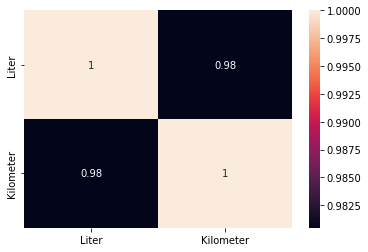

In [ ]:
import seaborn as sns

sns.heatmap(df_bensin.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_bensin[['Liter']]
y = df_bensin[['Kilometer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.size, y_train.size)

52 52


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[[6.45829591]]
[10.64122249]


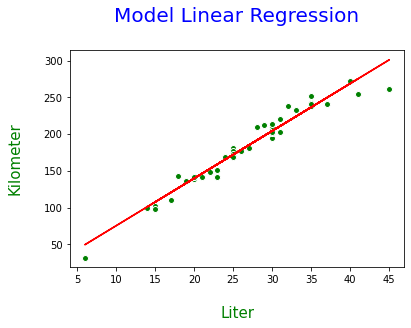

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='g', edgecolor='w')
plt.plot(X_train, model.coef_[0][0] * X_train + model.intercept_[0], '-r')
plt.xlabel('\nLiter', fontsize=15, color='g')
plt.ylabel('Kilometer\n', fontsize=15, color='g')
plt.title('Model Linear Regression\n', fontsize=20, color='b')

plt.show()

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

print(f"Score : {r2_score(y_test, y_pred)}")

Score : 0.9798523775622333


In [ ]:
bensin = 120
print(f"Dengan bensin sebanyak {bensin} liter dapat menempuh jarak sejauh {round(model.predict([[bensin]])[0][0], 2)} kilometer.")

Dengan bensin sebanyak 120 liter dapat menempuh jarak sejauh 785.64 kilometer.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Multiple Linear Regression (Numeric Predection)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_bensin2 = pd.read_csv('/content/drive/My Drive/Dataset/BUKU/bensin2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_bensin2.head()

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273


In [ ]:
df_bensin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Liter      65 non-null     int64 
 1   Penumpang  65 non-null     int64 
 2   Bagasi     65 non-null     int64 
 3   Kecepatan  65 non-null     int64 
 4   RPM        65 non-null     object
 5   Suhu       65 non-null     int64 
 6   Kilometer  65 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.7+ KB


In [ ]:
df_bensin2['RPM'].unique()

array(['3000', '4000', '3200', '2900', '3500', '2200', '2500', '3700',
       '2800', '3800', '3100', '3600', '2600', '2700', '2400', '4500',
       '4200', '4100', '4600', '2500\\'], dtype=object)

In [ ]:
df_bensin2 = df_bensin2[df_bensin2['RPM'] != '2500\\']
df_bensin2['RPM'] = pd.to_numeric(df_bensin2['RPM'])
df_bensin2['RPM'].unique()

array([3000, 4000, 3200, 2900, 3500, 2200, 2500, 3700, 2800, 3800, 3100,
       3600, 2600, 2700, 2400, 4500, 4200, 4100, 4600])

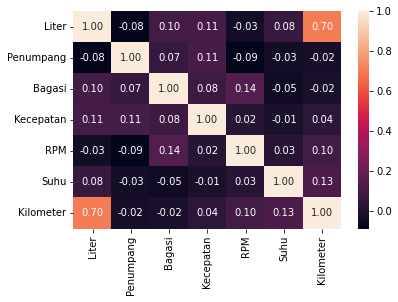

In [ ]:
import seaborn as sns

sns.heatmap(df_bensin2.corr(), 
            annot=True, 
            fmt='.2f',
            annot_kws={"size": 10})

In [ ]:
from sklearn.model_selection import train_test_split

X = df_bensin2[['Liter', 'Kecepatan', 'RPM', 'Suhu']]
y = df_bensin2[['Kilometer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.size, X_test.size)
print(y_train.size, y_test.size)

204 52
51 13


In [ ]:
from sklearn.preprocessing import MinMaxScaler

preprocessor = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.fit_transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[[ 6.44241706 -2.69478834  0.01229325  3.24352276]]
[-4.60912869]


In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

0.4866050787543701

# Logistic Regression (Binary Classification)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_pembeli_mobil = pd.read_csv('/content/drive/My Drive/Dataset/BUKU/calonpembeli_ch5.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_pembeli_mobil.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
df_pembeli_mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
df_pembeli_mobil.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [ ]:
df_pembeli_mobil['Status'].unique()

array([1, 2, 3, 0])

0 = single, 1 = menikah, 2 = menikah dengan anak, 3 = duda/janda

In [ ]:
df_pembeli_mobil['Kelamin'].unique()

array([0, 1])

0 = pria, 1 = wanita

In [ ]:
df_pembeli_mobil['Beli_Mobil'].unique()

array([1, 0])

0 = tidak, 1 = iya

In [ ]:
df_pembeli_mobil = df_pembeli_mobil[df_pembeli_mobil['Usia'] < 100]
df_pembeli_mobil.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
df_pembeli_mobil.isna().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [ ]:
df_pembeli_mobil['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df_pembeli_mobil[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df_pembeli_mobil[['Beli_Mobil']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.size, X_test.size)
print(y_train.size, y_test.size)

3990 1000
798 200


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

print(model.coef_)

[[-0.01594363 -0.17093161 -1.03941674  0.07720416  0.05686701]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1])

In [ ]:
y_test.head()

,Beli_Mobil
272,1
727,0
31,0
344,1
606,1


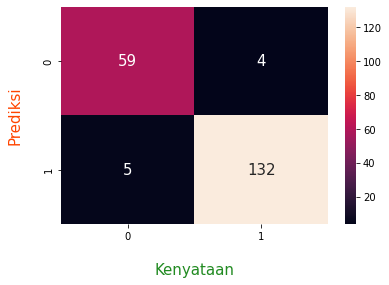

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusionmatrix = confusion_matrix(y_test, y_pred)
# print(confusionmatrix)
sns.heatmap(confusionmatrix,  
            annot=True, 
            fmt='.0f', 
            annot_kws={"size": 15})

plt.xlabel('\nKenyataan', fontsize=15, color='forestgreen')
plt.ylabel('Prediksi\n', fontsize=15, color='orangered')

plt.show()